### CROP YIELD PREDICTION USING LINEAR REGRESSION

##### Importing the Required modules and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

##### Reading and Analysing the data

In [2]:
data = pd.read_csv('./dataset.csv')
data

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"
...,...,...,...,...,...,...,...,...,...
995,614,6.379,94.132,11.571,5,98.673,2.891,6,"c,b"
996,490,6.980,82.727,11.264,5,101.090,3.500,6,"d,c,b"
997,392,NaN,58.218,11.859,4,103.673,4.005,6,"c,b,a"
998,773,10.070,67.905,11.567,4,104.343,2.339,6,a


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [4]:
data.drop('id', inplace=True, axis=1)
data.drop('categories', inplace=True, axis=1)

In [5]:
data.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
0,5.615,65.281,3.230,0,7.977,8.969,0
1,7.044,73.319,9.081,0,23.009,7.197,0
2,5.607,60.038,2.864,2,23.019,7.424,0
3,9.346,64.719,2.797,2,28.066,1.256,0
4,7.969,NaN,5.407,1,29.140,0.274,0


In [6]:
data.fillna(0, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   water             1000 non-null   float64
 1   uv                1000 non-null   float64
 2   area              1000 non-null   float64
 3   fertilizer_usage  1000 non-null   int64  
 4   yield             1000 non-null   float64
 5   pesticides        1000 non-null   float64
 6   region            1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [8]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


In [9]:
data.shape

(1000, 7)

In [10]:
data.columns

Index(['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region'],
      dtype='object')

##### Visualising the data

<AxesSubplot:xlabel='yield', ylabel='Count'>

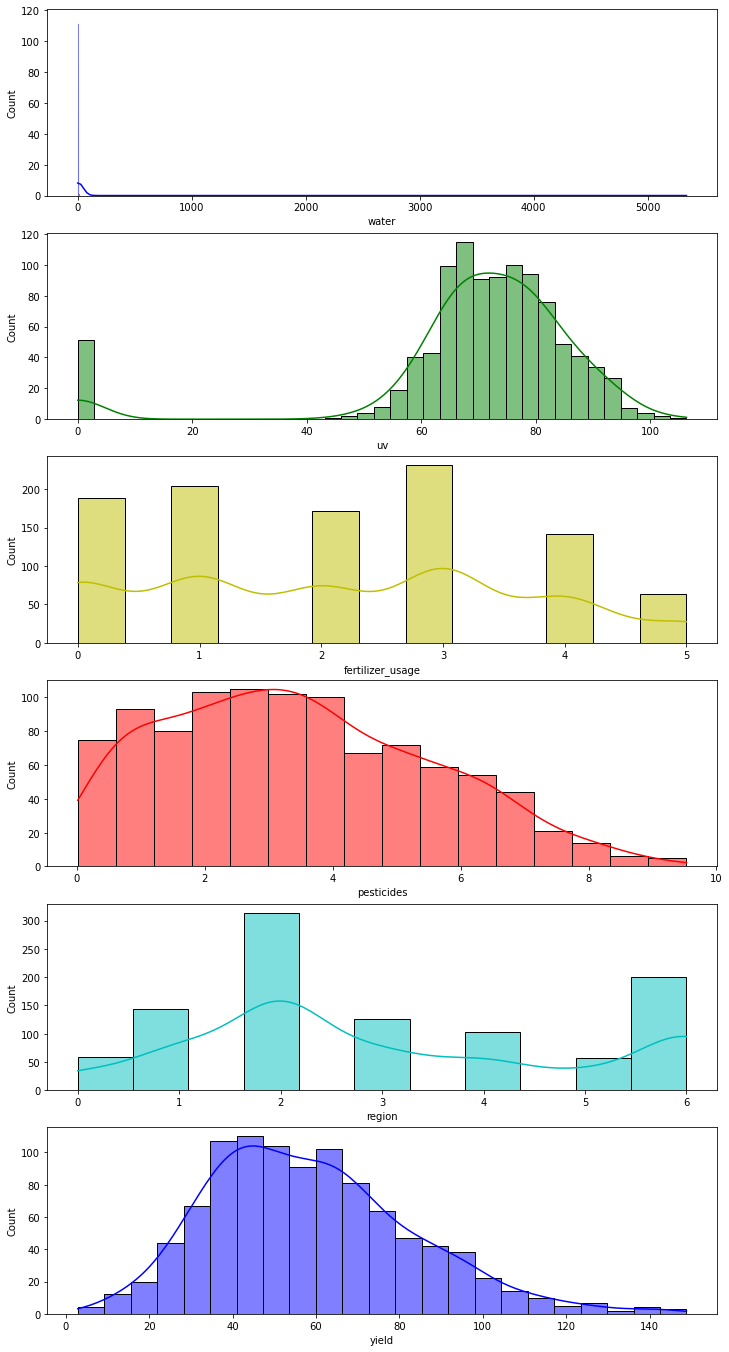

In [11]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.histplot(data.water,color='b',ax=ax[0], kde=True)
sns.histplot(data.uv,color='g',ax=ax[1], kde=True)
sns.histplot(data.fertilizer_usage,color='y',ax=ax[2], kde=True)
sns.histplot(data.pesticides,color='r',ax=ax[3], kde=True)
sns.histplot(data.region,color='c',ax=ax[4], kde=True)
sns.histplot(data['yield'],color='b',ax=ax[5], kde=True)

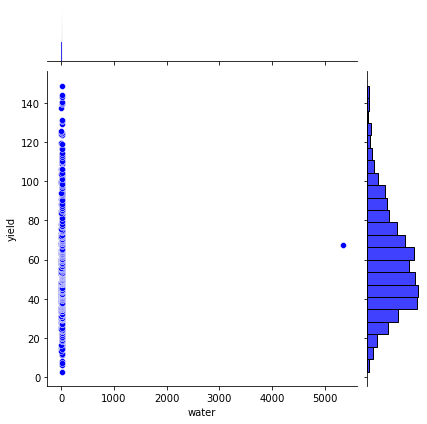

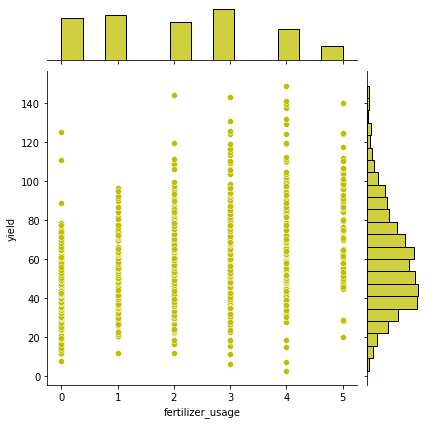

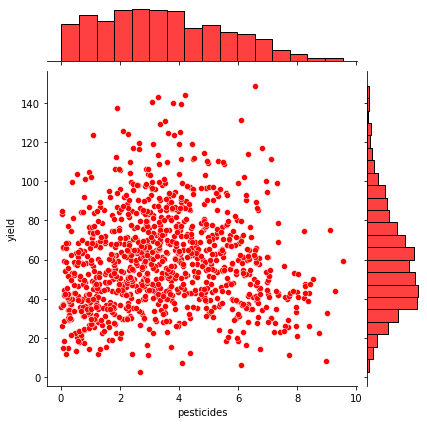

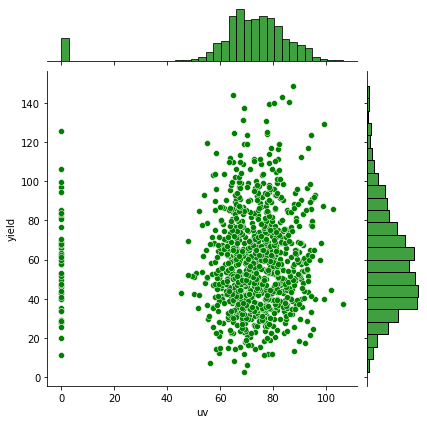

In [12]:
sns.jointplot(x='water',y='yield',data=data, color='b')
sns.jointplot(x='fertilizer_usage', y='yield',data=data, color='y')
sns.jointplot(x='pesticides', y='yield',data=data, color='r')
sns.jointplot(x='uv', y='yield',data=data, color='g')

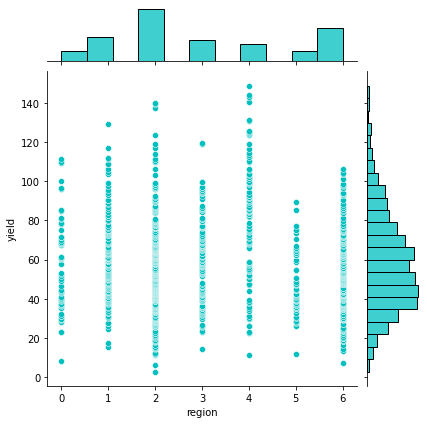

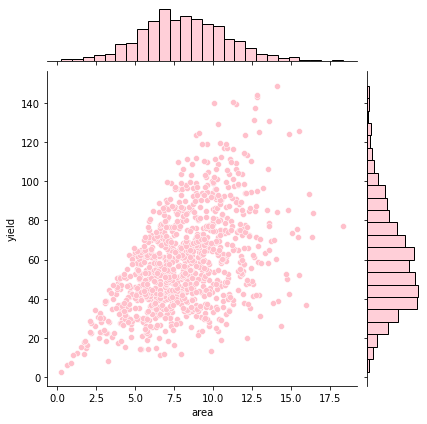

In [13]:
sns.jointplot(x='region', y='yield',data=data, color='c')
sns.jointplot(x='area', y='yield',data=data, color='pink')

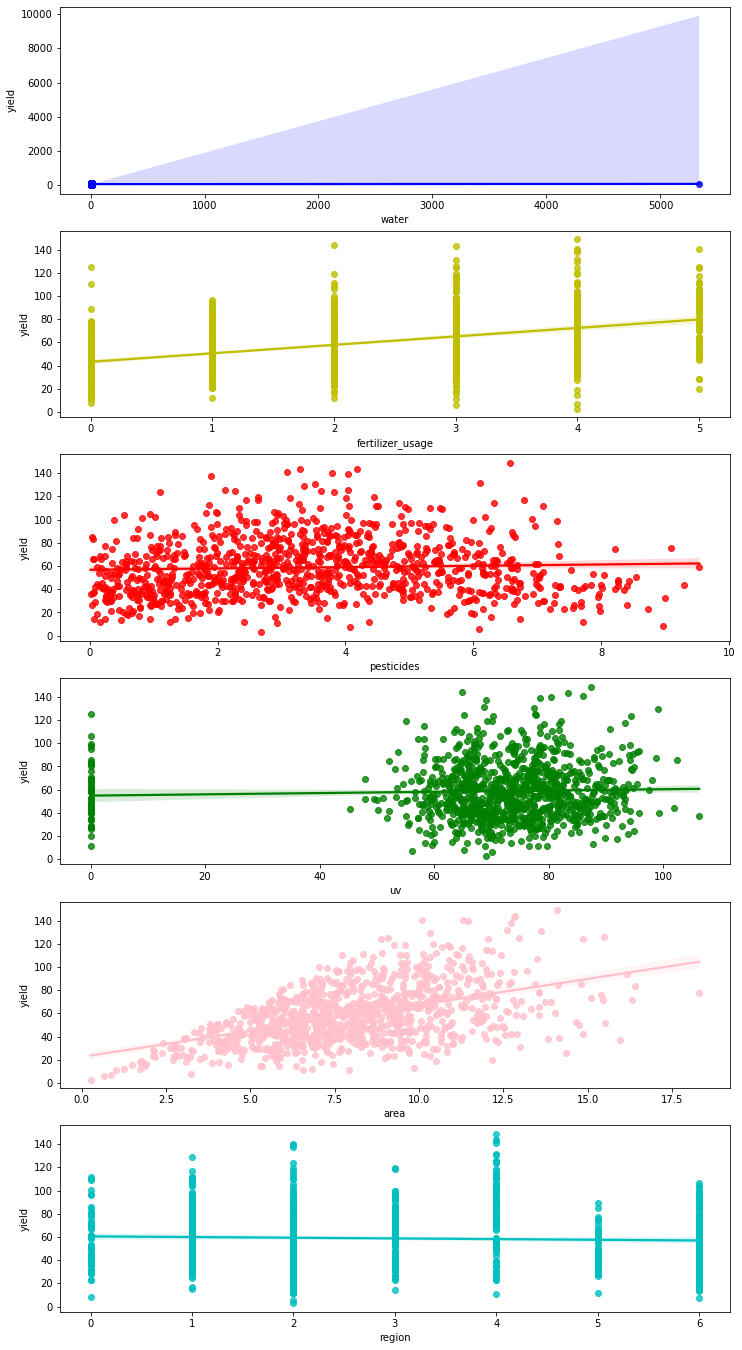

In [14]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.regplot(x="water", y="yield", data=data, color='b', ax=ax[0]);
sns.regplot(x="fertilizer_usage", y="yield", data=data, color='y', ax=ax[1]);
sns.regplot(x="pesticides", y="yield", data=data, color='r', ax=ax[2]);
sns.regplot(x="uv", y="yield", data=data, color='g', ax=ax[3]);
sns.regplot(x="area", y="yield", data=data, color='pink', ax=ax[4]);
sns.regplot(x="region", y="yield", data=data, color='c', ax=ax[5]);

In [86]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,water,uv,area,fertilizer_usage,yield,pesticides,region
water,1.000000,0.035519,0.000132,0.003419,0.014446,-0.008056,-0.050885
uv,0.035519,1.000000,0.063638,-0.020593,0.042384,-0.002886,0.003181
area,0.000132,0.063638,1.000000,-0.202512,0.491220,0.036302,0.369481
fertilizer_usage,0.003419,-0.020593,-0.202512,1.000000,0.452183,-0.056462,0.022406
yield,0.014446,0.042384,0.491220,0.452183,1.000000,0.048380,-0.045051
pesticides,-0.008056,-0.002886,0.036302,-0.056462,0.048380,1.000000,-0.010899
region,-0.050885,0.003181,0.369481,0.022406,-0.045051,-0.010899,1.000000


From the above figures we can see that pesticides, area and Uv has more effect on yield. Water does'nt effect the yield at all.

##### Spliting Data to Training and Testing.

In [192]:
np.random.seed(0)
data_train, data_test = train_test_split(
    data, train_size = 0.7, 
    test_size = 0.3, 
    random_state = 100
)

In [193]:
data_train.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
420,2.503,70.783,7.308,2,64.891,3.849,2
278,6.735,99.227,8.105,1,39.838,1.434,2
218,8.067,71.206,3.523,1,20.605,0.529,2
363,6.040,71.725,10.049,1,53.753,6.930,2
850,9.555,66.702,6.236,2,37.121,6.150,6


In [194]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


### Considering all the columns to predict yield

In [195]:
X_train = data_train.iloc[:, [0,1,2,3,5,6]]
y_train = data_train['yield']
X_test = data_test.iloc[:, [0,1,2,3,5,6]]
y_test = data_test['yield']

In [196]:
y_train.head()

420    64.891
278    39.838
218    20.605
363    53.753
850    37.121
Name: yield, dtype: float64

In [197]:
X_train.head()

,water,uv,area,fertilizer_usage,pesticides,region
420,2.503,70.783,7.308,2,3.849,2
278,6.735,99.227,8.105,1,1.434,2
218,8.067,71.206,3.523,1,0.529,2
363,6.040,71.725,10.049,1,6.930,2
850,9.555,66.702,6.236,2,6.150,6


In [198]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred

array([ 56.74694278,  50.25482916,  19.87337631,  66.32090506,
        33.66511754,  37.85123026,  93.21640046,  60.07614859,
        37.99048348,  53.44515005,  72.0636275 ,  43.69291671,
        32.29726838,  61.13309591,  72.26906895,  81.16430447,
        85.34939794,  57.59665519,  25.26045929,  20.05759276,
        48.41072236,  76.46919247,  41.46978735,  53.45795904,
        74.82802543,  41.76073039,  43.2183265 ,  69.20049229,
        49.00932614,  63.50342053,  34.38920508,  55.75144122,
        78.23100104,  34.81161919,  45.25111931,  61.12084906,
        27.77512111,  43.62046749,  93.92475887,  56.76611548,
        43.27823303,  78.84861099,  68.70644638,  78.6689014 ,
        88.73828913,  51.18263953,  51.57403767,  73.20973197,
        65.71915449,  49.8659344 ,  68.96726457,  23.98830732,
        75.53254926,  56.92577935,  34.67338425,  60.11945269,
        43.45997378,  74.17575382,  70.58074487,  78.05688029,
        13.06369931,  61.95404412,  42.65974278,  80.09

In [199]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.6418061933285719  R square value of test data:  0.6812355639952077


### Considering the attributes those are result of feature selection

In [200]:
rfe = RFE(reg)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('water', False, 4),
 ('uv', False, 3),
 ('area', True, 1),
 ('fertilizer_usage', True, 1),
 ('pesticides', False, 2),
 ('region', True, 1)]

In [201]:
X_train.columns[rfe.support_]

Index(['area', 'fertilizer_usage', 'region'], dtype='object')

In [188]:
X_train = data_train.iloc[:, [2,3,6]]
X_test = data_test.iloc[:, [2,3,6]]
X_train.head()

,area,fertilizer_usage,region
420,7.308,2,2
278,8.105,1,2
218,3.523,1,2
363,10.049,1,2
850,6.236,2,6


In [189]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [190]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.6395075314394862  R square value of test data:  0.677811464640186


### Only considering Water to predict yield.

In [133]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [0]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [0]]

In [134]:
y_train.head()

420    64.891
278    39.838
218    20.605
363    53.753
850    37.121
Name: yield, dtype: float64

In [135]:
X_train.head()

,water
420,2.503
278,6.735
218,8.067
363,6.040
850,9.555


In [136]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred

array([58.28549092, 58.29413583, 58.29685677, 58.29271612, 58.29989638,
       58.29362106, 58.29541255, 58.2911575 , 58.29152111, 58.28858773,
       58.30148768, 58.29179688, 58.29870137, 58.29441364, 58.2864265 ,
       58.29320842, 58.28823637, 58.29202771, 58.28630802, 58.29381103,
       58.29791083, 58.30334454, 58.29508979, 58.30014968, 58.30320972,
       58.28037792, 58.28485154, 58.28147487, 58.29891586, 58.29836636,
       58.29946945, 58.29099204, 58.28840388, 58.29318595, 58.29081841,
       58.28883081, 58.29171926, 58.28832625, 58.29005646, 58.28059036,
       58.29888522, 58.28607923, 58.29642167, 58.29220952, 58.29128824,
       58.28496389, 58.28037792, 58.29730209, 58.29069993, 58.30582648,
       58.29747777, 58.29123308, 58.29437279, 58.30713997, 58.28988079,
       58.29509184, 58.28732735, 58.29274676, 58.2806925 , 58.30734629,
       58.29782708, 58.29299393, 58.29526343, 58.29201546, 58.2846922 ,
       58.28635296, 58.30349979, 58.28101525, 58.29638898, 58.28

In [137]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.00028067054951408377  R square value of test data:  -0.0037338290698163412


### Only considering UV to predict yield.

In [138]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [1]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [1]]

In [139]:
X_train.head()

,uv
420,70.783
278,99.227
218,71.206
363,71.725
850,66.702


In [140]:
y_train.head()

420    64.891
278    39.838
218    20.605
363    53.753
850    37.121
Name: yield, dtype: float64

In [141]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [142]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  3.3320264312464154e-05  R square value of test data:  -0.002341613951195365


### Only considering area to predict yield.

In [143]:
X_train = data_train.iloc[:, [2]]
X_test = data_test.iloc[:, [2]]

In [144]:
X_train.head()

,area
420,7.308
278,8.105
218,3.523
363,10.049
850,6.236


In [145]:
y_train.head()

420    64.891
278    39.838
218    20.605
363    53.753
850    37.121
Name: yield, dtype: float64

In [146]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [147]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.223450518590949  R square value of test data:  0.2759975216240005


### Only considering fertilizer_usage to predict yield.

In [148]:
X_train = data_train.iloc[:, [3]]
X_test = data_test.iloc[:, [3]]

In [149]:
X_train.head()

,fertilizer_usage
420,2
278,1
218,1
363,1
850,2


In [150]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [151]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.21960209236037886  R square value of test data:  0.1661812879615311


### Only considering pesticides to predict yield.

In [152]:
X_train = data_train.iloc[:, [5]]
X_test = data_test.iloc[:, [5]]
X_train.head()

,pesticides
420,3.849
278,1.434
218,0.529
363,6.930
850,6.150


In [153]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [154]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0002895848479296248  R square value of test data:  7.441654268902642e-05


### Only considering region to predict yield.

In [155]:
X_train = data_train.iloc[:, [6]]
X_test = data_test.iloc[:, [6]]
X_train.head()

,region
420,2
278,2
218,2
363,2
850,6


In [156]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [157]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  6.220319639815841e-05  R square value of test data:  -0.006508840937565541



###### From the above models, we can see that pesticides has greater R^2 value on test data.

### Considering pesticides and water to predict yield.

In [158]:
X_train = data_train.iloc[:, [5,0]]
X_test = data_test.iloc[:, [5,0]]
X_train.head()

,pesticides,water
420,3.849,2.503
278,1.434,6.735
218,0.529,8.067
363,6.930,6.040
850,6.150,9.555


In [159]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [160]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0005765303495900431  R square value of test data:  0.00012794522412218345


### Considering pesticides and UV to predict yield

In [161]:
X_train = data_train.iloc[:, [5,1]]
X_test = data_test.iloc[:, [5,1]]
X_train.head()

,pesticides,uv
420,3.849,70.783
278,1.434,99.227
218,0.529,71.206
363,6.930,71.725
850,6.150,66.702


In [162]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [163]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0003261458645930082  R square value of test data:  0.0015646203143735438


### Considering pesticides and area to predict yield

In [164]:
X_train = data_train.iloc[:, [5,1]]
X_test = data_test.iloc[:, [5,1]]
X_train.head()

,pesticides,uv
420,3.849,70.783
278,1.434,99.227
218,0.529,71.206
363,6.930,71.725
850,6.150,66.702


In [165]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [166]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0003261458645930082  R square value of test data:  0.0015646203143735438


### Considering pesticides and area to predict yield

In [167]:
X_train = data_train.iloc[:, [5,2]]
X_test = data_test.iloc[:, [5,2]]
X_train.head()

,pesticides,area
420,3.849,7.308
278,1.434,8.105
218,0.529,3.523
363,6.930,10.049
850,6.150,6.236


In [168]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [169]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.22378345086847573  R square value of test data:  0.27785406430050963


### Considering pesticides and fertilizer usage to predict yield

In [170]:
X_train = data_train.iloc[:, [5,3]]
X_test = data_test.iloc[:, [5,3]]
X_train.head()

,pesticides,fertilizer_usage
420,3.849,2
278,1.434,1
218,0.529,1
363,6.930,1
850,6.150,2


In [171]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [172]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.22156835268972985  R square value of test data:  0.1769493534368871


### Considering pesticides and region to predict yield

In [173]:
X_train = data_train.iloc[:, [5,6]]
X_test = data_test.iloc[:, [5,6]]
X_train.head()

,pesticides,region
420,3.849,2
278,1.434,2
218,0.529,2
363,6.930,2
850,6.150,6


In [174]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [175]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0003589551183580397  R square value of test data:  -0.002805765306660435
